In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("Cleaning_Pesantren.xls")

In [3]:
df.head()

,Provinsi,Kabupaten,Pesantren,Tipe pesantren Satuan pendidikan,Tipe pesantren Penyelenggara satuan pendidikan,Jumlah santri Mukim,Jumlah santri Tidak mukim
0,ACEH,Aceh Selatan,42,33,9,7224,3329
1,ACEH,Aceh Tenggara,34,1,33,5395,1350
2,ACEH,Aceh Timur,82,65,17,7137,3268
3,ACEH,Aceh Tengah,19,3,16,1478,1241
4,ACEH,Aceh Barat,37,21,16,5069,1260


In [4]:
df.shape

(448, 7)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# membuat df untuk melihat jumlah pesantren di setiap provinsi

pesantren_per_provinsi = pd.crosstab(index = df["Provinsi"], columns = "Jumlah Pesantren", values = df["Pesantren"], aggfunc = "sum").sort_values("Jumlah Pesantren", ascending = False)
pesantren_per_provinsi.head(10)

col_0,Jumlah Pesantren
Provinsi,
JAWA BARAT,8343
BANTEN,4579
JAWA TIMUR,4452
JAWA TENGAH,3787
ACEH,1177
NTB,684
LAMPUNG,677
DI YOGYAKARTA,319
SUMATERA SELATAN,317


In [8]:
# membuat df untuk melihat jumlah pesantren di setiap kota

pesantren_per_kota = pd.crosstab(index = df["Kabupaten"], columns = "Jumlah Pesantren", values = df["Pesantren"], aggfunc = "sum").sort_values("Jumlah Pesantren", ascending = False).head(20)
pesantren_per_kota

col_0,Jumlah Pesantren
Kabupaten,
Lebak,1593
Tasikmalaya,1318
Pandeglang,1168
Bogor,1060
Garut,1030
Serang,1023
Cirebon,725
Sukabumi,629
Jember,611


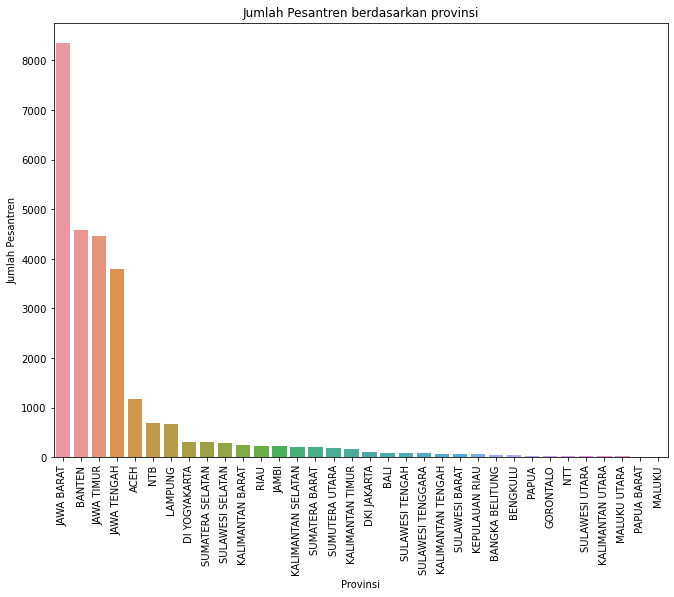

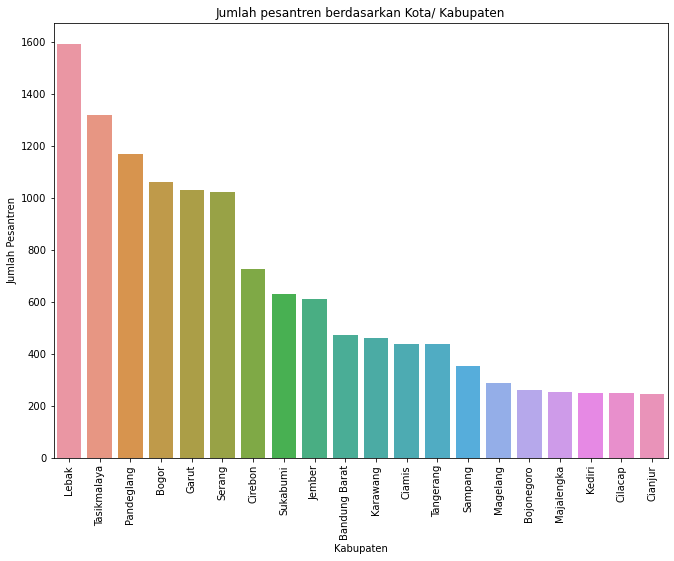

<Figure size 432x288 with 0 Axes>

In [16]:
pesantren_per_provinsi = pesantren_per_provinsi.reset_index()
plt.figure(figsize = (11,8))
sns.barplot(x = "Provinsi",
           y = "Jumlah Pesantren",
           data = pesantren_per_provinsi)
plt.xticks(rotation = 90)
plt.title("Jumlah Pesantren berdasarkan provinsi")


pesantren_per_kota = pesantren_per_kota.reset_index()
plt.figure(figsize = (11,8))
sns.barplot(x = "Kabupaten",
           y = "Jumlah Pesantren",
           data = pesantren_per_kota)
plt.xticks(rotation = 90)
plt.title("Jumlah pesantren berdasarkan Kota/ Kabupaten")

plt.savefig("pesantren_per_provinsi.png")
plt.savefig("pesantren_per_kota")
plt.show()

- Jika dilihat dari barplot di atas, provinsi Jawa Barat menjadi provinsi yang memiliki jumlah pesantren terbanyak.
- Jumlah tsb hampir 2x lipat lebih banyak dari jumlah pesantren yang ada di urutan ke-2 yaitu Banten
- Namun jika jumlah pesantren dilihat dari kota/ kabupaten, 2 kota yang ada di Banten menjadi 3 besar yang memiliki jumlah pesantren yaitu Lebak dan Pandeglang.

In [10]:
# Membuat kolom baru (Jumlah santri)

df["Jumlah Santri"] = df["Jumlah santri Mukim"] + df["Jumlah santri Tidak mukim"]

In [11]:
df.head()

,Provinsi,Kabupaten,Pesantren,Tipe pesantren Satuan pendidikan,Tipe pesantren Penyelenggara satuan pendidikan,Jumlah santri Mukim,Jumlah santri Tidak mukim,Jumlah Santri
0,ACEH,Aceh Selatan,42,33,9,7224,3329,10553
1,ACEH,Aceh Tenggara,34,1,33,5395,1350,6745
2,ACEH,Aceh Timur,82,65,17,7137,3268,10405
3,ACEH,Aceh Tengah,19,3,16,1478,1241,2719
4,ACEH,Aceh Barat,37,21,16,5069,1260,6329


In [12]:
santri_per_provinsi = pd.crosstab(index = df["Provinsi"], columns = "Jumlah Santri", values = df["Jumlah Santri"], aggfunc = "sum").sort_values("Jumlah Santri", ascending = False)
santri_per_provinsi.head(10)

col_0,Jumlah Santri
Provinsi,
JAWA TIMUR,761717
JAWA BARAT,604613
JAWA TENGAH,448395
NTB,273711
ACEH,220096
BANTEN,208037
LAMPUNG,82483
SULAWESI SELATAN,81178
KALIMANTAN SELATAN,78084


In [14]:
santri_per_kota = pd.crosstab(index = df["Kabupaten"], columns = "Jumlah santri", values = df["Jumlah Santri"], aggfunc = "sum").sort_values("Jumlah santri", ascending = False).head(20)
santri_per_kota.head(10)

col_0,Jumlah santri
Kabupaten,
Lombok Timur,98807
Bogor,85366
Tasikmalaya,84901
Lombok Tengah,81460
Lamongan,66852
Garut,66041
Kediri,64710
Pandeglang,61009
Pamekasan,55001


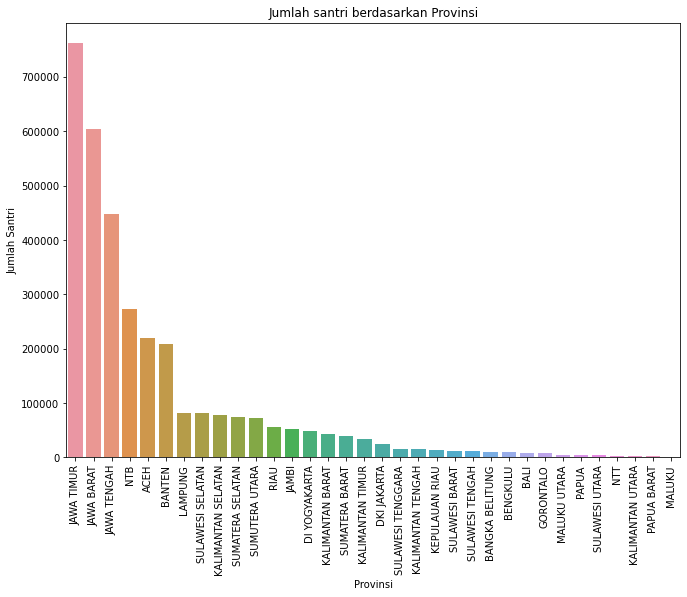

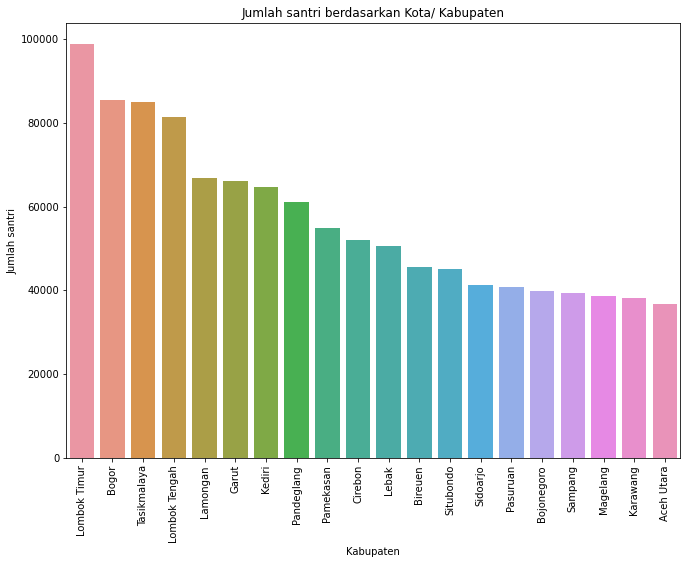

In [17]:
# membuat data visualisasi untuk jumlah santri di setiap provinsi

santri_per_provinsi = santri_per_provinsi.reset_index()
plt.figure(figsize = (11,8))
sns.barplot(x = "Provinsi",
           y = "Jumlah Santri",
           data = santri_per_provinsi)
plt.xticks(rotation = 90)
plt.title("Jumlah santri berdasarkan Provinsi")

# membuat data visualisasi untuk jumlah santri di setiap kota
santri_per_kota = santri_per_kota.reset_index()
plt.figure(figsize = (11,8))
sns.barplot(x = "Kabupaten",
           y = "Jumlah santri",
           data = santri_per_kota)
plt.xticks(rotation = 90)
plt.title("Jumlah santri berdasarkan Kota/ Kabupaten")

plt.savefig("santri_per_provinsi")
plt.savefig("santri_per_kota")
plt.show()

- Jika dikelompokan berdasarkan provinsi, Jawa Timur, Jawa Barat dan Jawa Tengah menjadi 3 besar secara berurutan
- Namun jika dikelompokan berdasarkan kota, Lombok Timur, Bogor dan Tasikmalaya menjadi 3 kota 